In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
# actively reload module (during working on analyse_embeddings.py)
import importlib
import matplotlib.image as mpimg
import mat73
font = {'family' : 'Helvetica',
        #'sans-serif': ['Helvetica'],
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

matplotlib.rc('font', **font)
matplotlib.rc('axes.spines',right=False)
matplotlib.rc('axes.spines',top=False)
matplotlib.rc('axes',edgecolor='black')
matplotlib.rc('xtick',color='black',bottom=True)
matplotlib.rc('ytick',color='black',left=True)



### COLOR definitions ###
#colors of undistorted and distorted mesh
color_undist = np.array([0,105,170])/255
color_dist = np.array([200,80,60])/255

# for yaw, pitch and roll
colors_ypr = [ np.array([210,150,0])/255,
               np.array([80,170,200])/255,
               np.array([175,110,150])/255]

# for undistorted, add 1 add 3
colors_add1 =  np.array([50,110,30])/255
colors_add3 =  np.array([200,80,60])/255

colors_add1 = sb.blend_palette(['#214017','#326e1e','#4ad41c'],13)
colors_add3 = sb.blend_palette(['#994738','#ee5c43','#ed8e7d'],13)

 #sb.color_palette("Oranges")



#f6bd60, #139a43, #0eb1d2, #805d93, #c05746


## FoV size of virtual frame
fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree


## Behaviour

In [2]:
## Load all tracking data
# Load all subjects and calculate mean rotation vel

headmov_df = pd.DataFrame()
gaze_df = pd.DataFrame()

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
for subj in subj_list:
    #tracking_data = pd.read_pickle('../../data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    tracking_trial_data = pd.read_pickle('../data/' + str(subj).zfill(3) + 'trial_data.pkl')
    headmov_df = pd.concat([headmov_df,pd.DataFrame({'subj':[subj],
                                                     'mean_yaw':[tracking_trial_data.mean_yaw_vel.mean()],
                                                     'mean_pitch':[tracking_trial_data.mean_pitch_vel.mean()],
                                                     'mean_roll':[tracking_trial_data.mean_roll_vel.mean()]})])
    gaze_df = pd.concat([gaze_df,pd.DataFrame({'subj':[subj],
                                            'long':[tracking_trial_data.mean_c_gaze_long.mean()],
                                            'lat':[tracking_trial_data.mean_c_gaze_lat.mean()]})])


# Load example tracking data
subj = 4
tracking_data = pd.read_pickle('../data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
subj = 3
tracking_trial_data = pd.read_pickle('../data/' + str(subj).zfill(3) + 'trial_data.pkl')

In [3]:
headmov_df.reset_index().index

RangeIndex(start=0, stop=13, step=1)

In [4]:
headmov_df

,subj,mean_yaw,mean_pitch,mean_roll
0,3,3.425157,34.686567,3.381272
0,4,2.220876,17.845596,2.465277
0,5,2.966014,23.227862,2.849668
0,7,3.275828,29.251533,3.086079
0,8,2.262237,2.751562,1.763916
0,9,4.250378,4.520750,1.393217
0,10,6.638351,17.137588,3.352157
0,11,2.996846,2.320001,1.737033
0,12,27.868508,13.903750,5.911087
0,13,9.957392,6.234585,2.571108


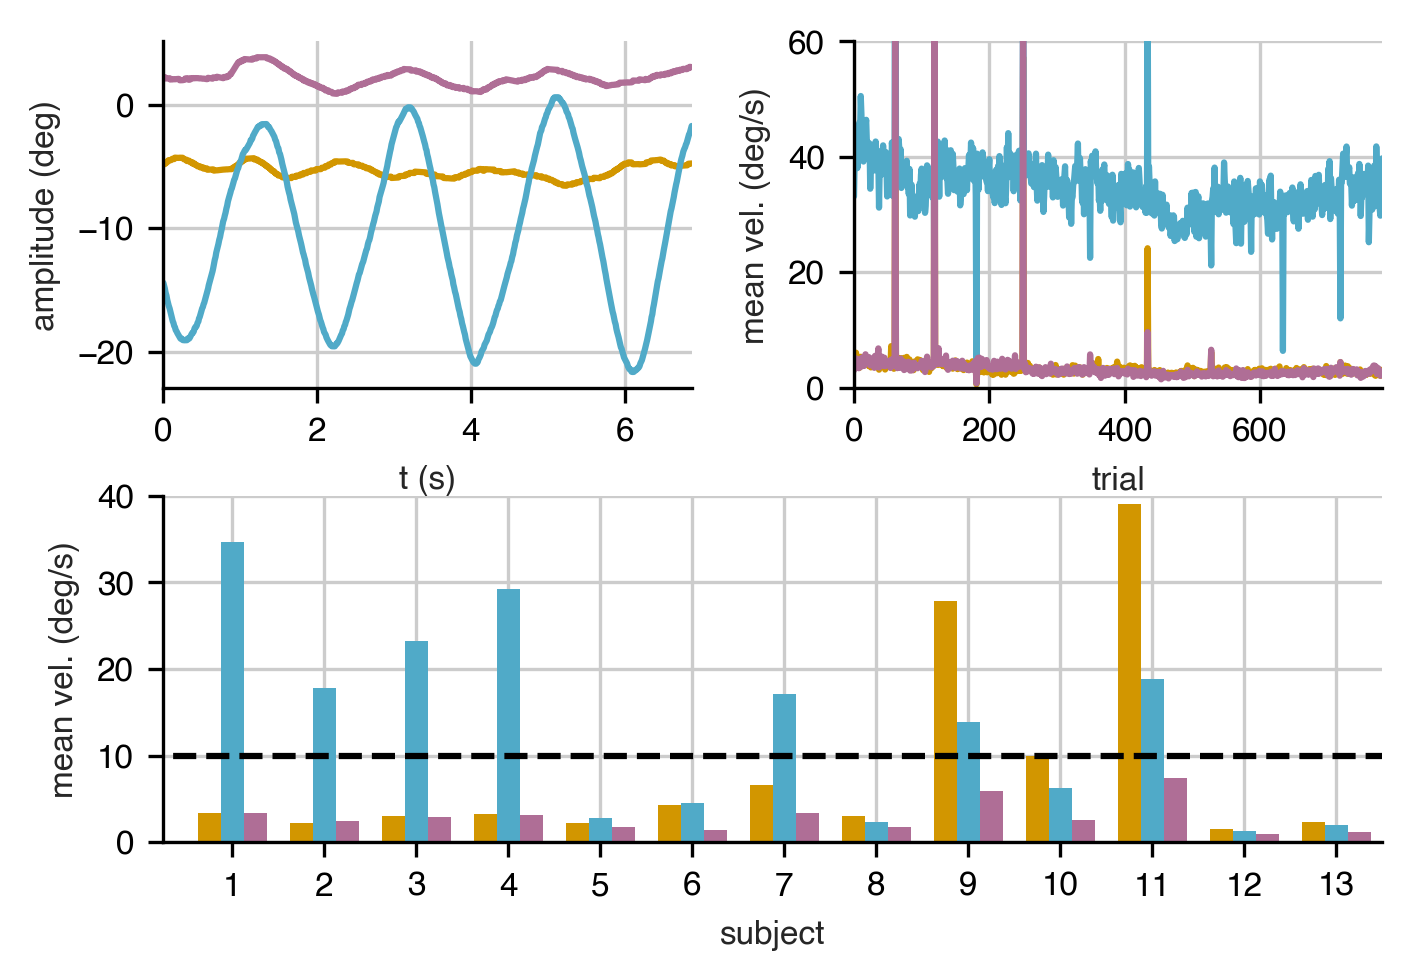

In [17]:
# plotting
cm = 1/2.54
fig, ax = plt.subplot_mosaic([['exmpl_trial','exmpl_subj'],['barplot','barplot']],figsize=(12*cm, 8*cm),dpi=300)
plt.tight_layout()


trial = 100
rep = 0
ind = (tracking_data.t == trial) & (tracking_data.rep == rep)
n_subj = headmov_df.reset_index().index.max() + 1
t0 = tracking_data.Timestamp[ind.idxmax()]
ax['exmpl_trial'].plot(tracking_data.Timestamp[ind]-t0,tracking_data.yaw[ind],label="yaw",color = colors_ypr[0])
ax['exmpl_trial'].plot(tracking_data.Timestamp[ind]-t0,tracking_data.pitch[ind],label="pitch",color = colors_ypr[1])
ax['exmpl_trial'].plot(tracking_data.Timestamp[ind]-t0,tracking_data.roll[ind],label="roll",color = colors_ypr[2])
#ax['exmpl_trial'].legend(ncol=3,bbox_to_anchor=(0.1, 1.05))
ax['exmpl_trial'].set_xlabel('t (s)')
ax['exmpl_trial'].set_ylabel('amplitude (deg)')
ax['exmpl_trial'].set_xlim([0,tracking_data.Timestamp[ind].max() - t0])

ax['exmpl_subj'].plot(tracking_trial_data.index,tracking_trial_data.mean_yaw_vel,color = colors_ypr[0])
ax['exmpl_subj'].plot(tracking_trial_data.index,tracking_trial_data.mean_pitch_vel,color = colors_ypr[1])
ax['exmpl_subj'].plot(tracking_trial_data.index,tracking_trial_data.mean_roll_vel,color = colors_ypr[2])
ax['exmpl_subj'].set_xlim([0,tracking_trial_data.index.max()])
ax['exmpl_subj'].set_ylim([0,60])
ax['exmpl_subj'].set_xlabel('trial')
ax['exmpl_subj'].set_ylabel('mean vel. (deg/s)')

width = 0.25  # the width of the bars
ax['barplot'].bar(headmov_df.reset_index().index +1 -width,headmov_df.mean_yaw,width,edgecolor= 'none',color = colors_ypr[0])
ax['barplot'].bar(headmov_df.reset_index().index +1,headmov_df.mean_pitch,width,edgecolor= 'none',color = colors_ypr[1])
ax['barplot'].bar(headmov_df.reset_index().index +1 +width,headmov_df.mean_roll,width,edgecolor= 'none',color = colors_ypr[2])

ax['barplot'].plot([0,n_subj+1], [10,10],'--',color='k')
ax['barplot'].set_xlim([width,n_subj + 2*width])
ax['barplot'].set_ylim([0,40])
ax['barplot'].set_xticks(range(1,n_subj+1))


plt.ylabel('mean vel. (deg/s)')
plt.xlabel('subject')

plt.savefig('head_behaviour.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.savefig('head_behaviour.svg', bbox_inches = 'tight', pad_inches = 0)

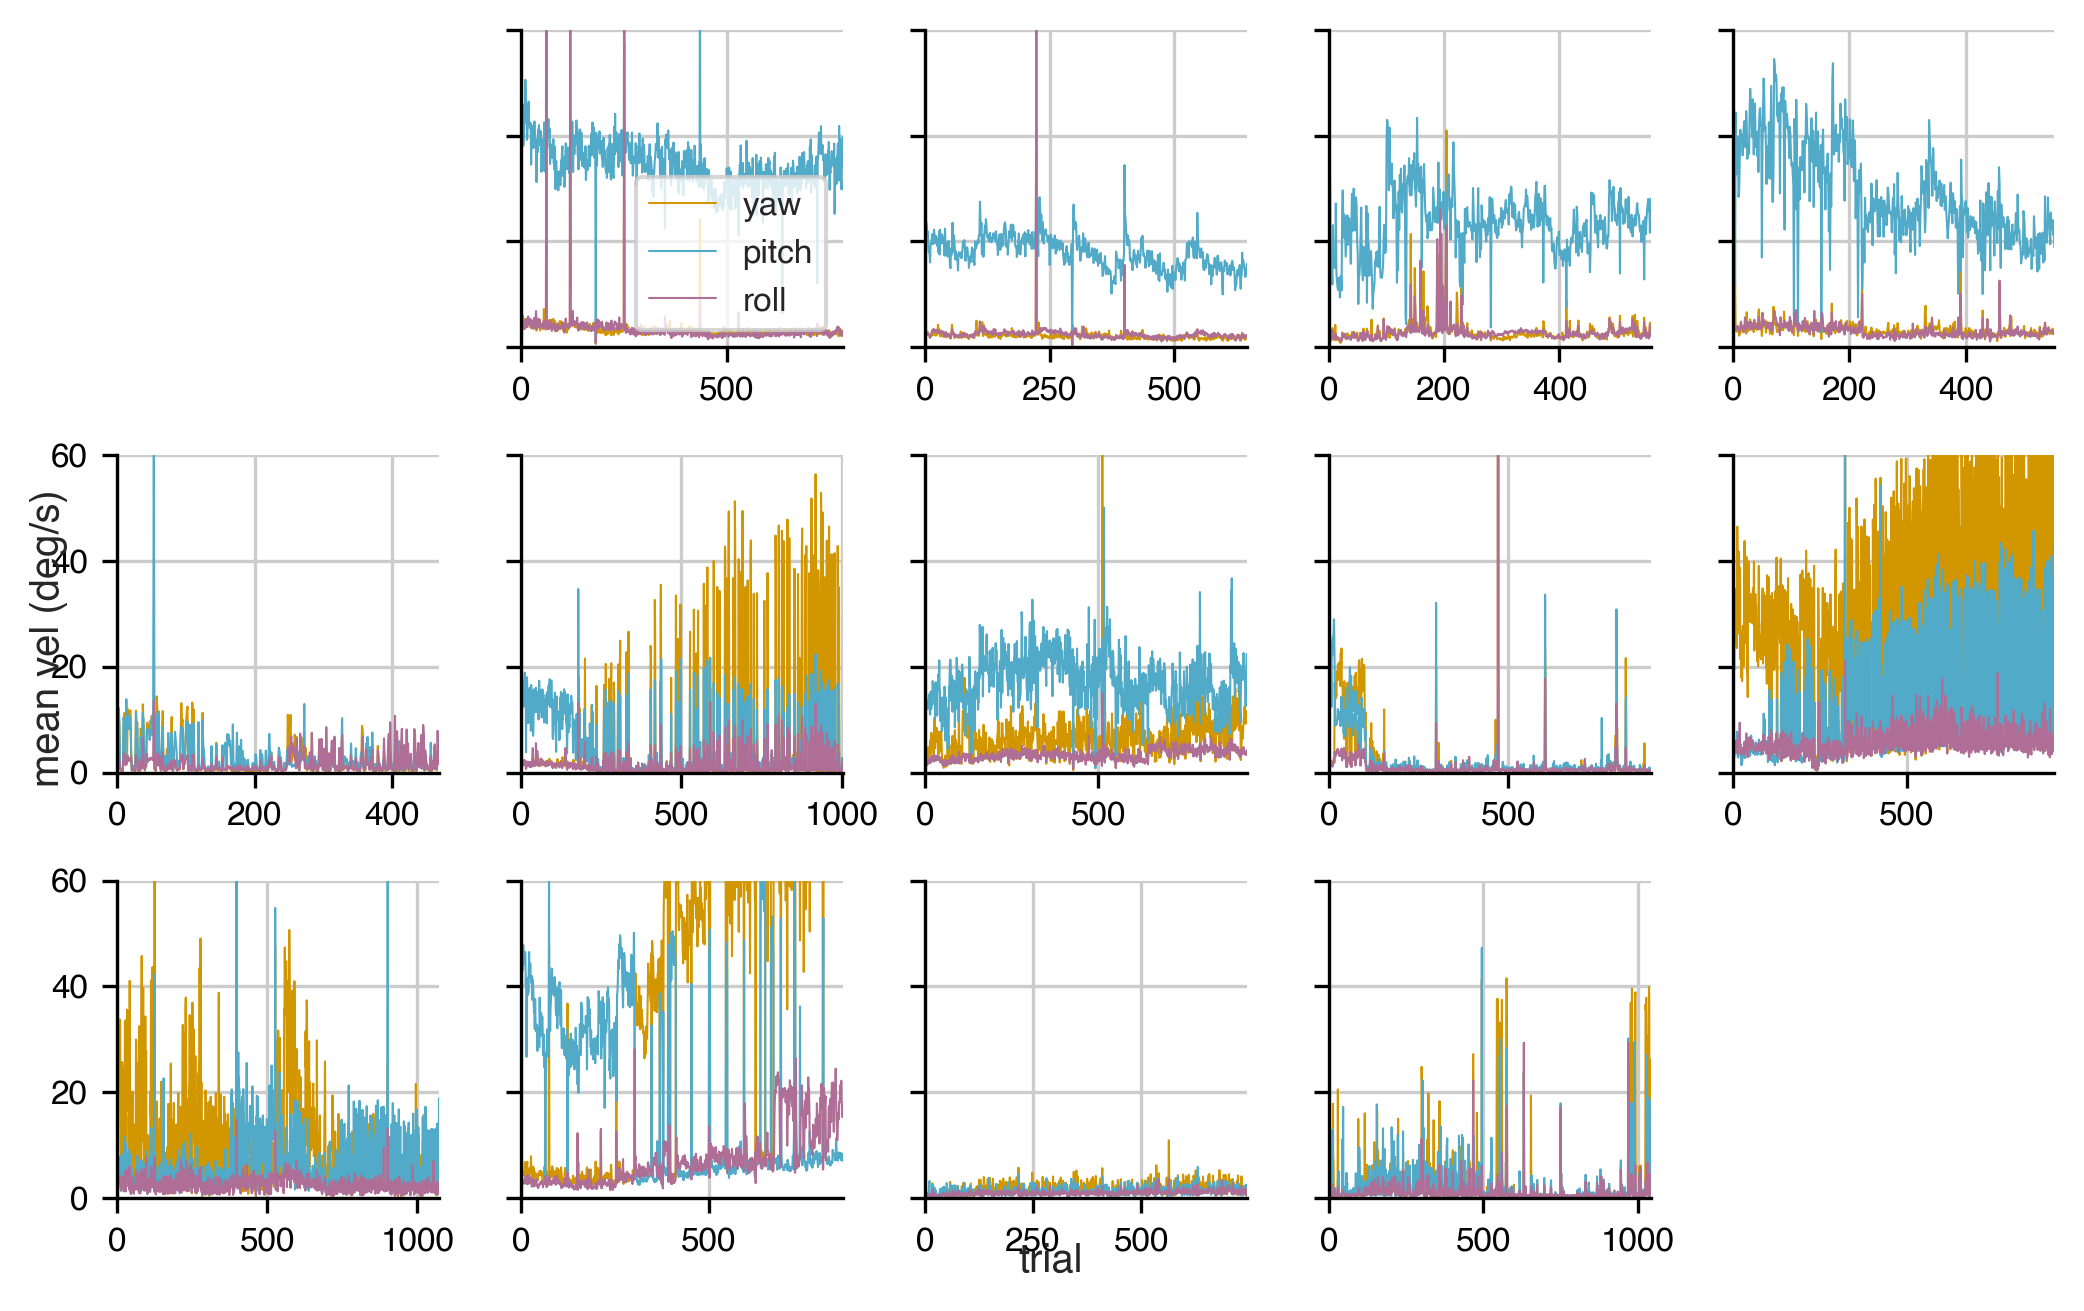

In [6]:
# plotting
cm = 1/2.54

fig, axs = plt.subplots(3,5,figsize=(18.0*cm, 18.0/1.62*cm),dpi=300,sharex=False, sharey=True)
plt.tight_layout()
subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ax = axs.flatten()

for i in range(len(subj_list)):
    subj = subj_list[i]
    # load data from pickle
    tracking_data = pd.read_pickle('../data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    #tracking_data = tracking_data[0:1000].copy()
    tracking_trial_data = pd.read_pickle('../data/' + str(subj).zfill(3) + 'trial_data.pkl')
    ax[i+1].plot(tracking_trial_data.index,tracking_trial_data.mean_yaw_vel,color = colors_ypr[0],linewidth=0.5,label = 'yaw')
    ax[i+1].plot(tracking_trial_data.index,tracking_trial_data.mean_pitch_vel,color = colors_ypr[1],linewidth=0.5,label = 'pitch')
    ax[i+1].plot(tracking_trial_data.index,tracking_trial_data.mean_roll_vel,color = colors_ypr[2],linewidth=0.5,label = 'roll')
    ax[i+1].set_xlim([0,tracking_trial_data.index.max()])
    ax[i+1].set_ylim([0,60])
    #ax[i+1].set_xlabel('trial')
    #ax[i+1].set_ylabel('mean vel. (deg/s)')

ax[0].axis("off")
ax[1].legend()
ax[-1].axis("off")
fig.supxlabel('trial')
fig.supylabel('mean velocity (deg/s)')
plt.savefig('individual_headmov.svg', bbox_inches='tight', pad_inches = 0)
